In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import math
print(cv2.__version__)

4.5.5


[[240 240 241 ... 246 247 246]
 [237 238 239 ... 244 242 242]
 [233 233 234 ... 240 237 237]
 ...
 [  9   0   0 ...  17  24  31]
 [ 10   1   0 ...  16  11  18]
 [ 22  13  10 ...  23  28  35]]
(310, 410)
1


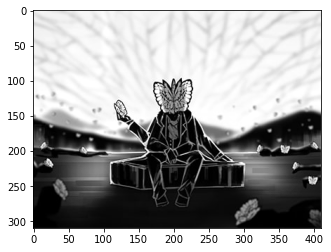

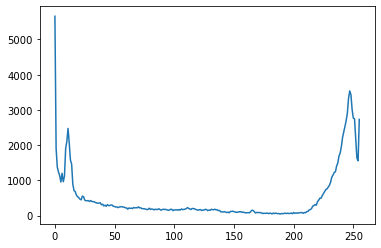

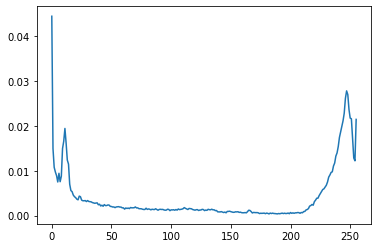

In [2]:
#getting the greyscale of the image: This step is from the Image Histogram.ipynb
img = cv2.imread('CardCoffinArt.jpg', 0)
hist = cv2.calcHist([img],[0],None,[256],[0,256])
temp = [img]
print(img)
print(img.shape)
print(len(temp))

plt.imshow(img, 'gray')
plt.show()

plt.plot(hist)
plt.show()

plt.plot(hist/img.size)
plt.show()

310
[[240 240 241 ... 246 247 246]
 [237 238 239 ... 244 242 242]
 [233 233 234 ... 240 237 237]
 ...
 [  9   0   0 ...  17  24  31]
 [ 10   1   0 ...  16  11  18]
 [ 22  13  10 ...  23  28  35]]


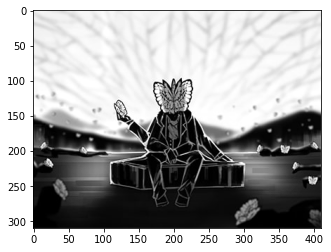

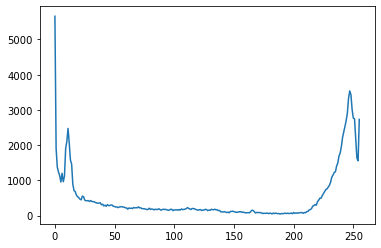

[[116 116 116 ... 118 119 118]
 [114 115 115 ... 118 117 117]
 [112 112 113 ... 116 114 114]
 ...
 [  4   0   0 ...   8  11  14]
 [  4   0   0 ...   7   5   8]
 [ 10   6   4 ...  11  13  16]]


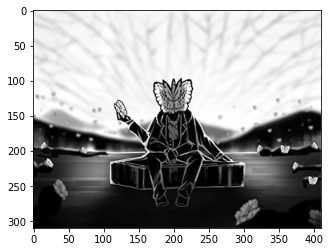

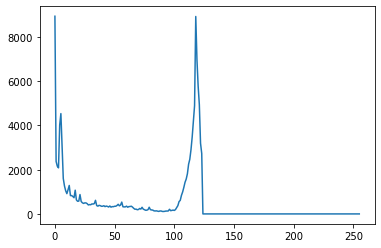

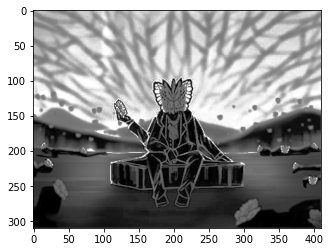

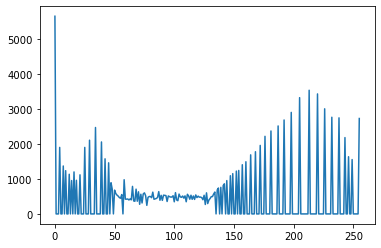

In [7]:
#Part 1 of Assignment 1
img = cv2.imread('CardCoffinArt.jpg', 0)
hist = cv2.calcHist([img],[0],None,[256],[0,256])
temp = [img]
img2 = img.shape
print(img2[0])
equ = cv2.equalizeHist(img)
def histogramEqualize(img):
    #flattens the image into a single array.
    tempImg = img.flatten()
    imgShape = img.shape
    #Takes the cumulative sum of the array
    tempImg2 = tempImg.cumsum()
    #making the transformation for the image array
    #Making sure numerator is between 0-255
    nj = (tempImg2  - tempImg2.min())* 255
    #Making denomenator
    M = imgShape[0]
    N = imgShape[1]
    MN = M*N
    #Normalizing the cdf and doing 'uint8' so no floating points
    tempImg2 = nj/MN
    tempImg2 = tempImg2.astype('uint8')
    #Unflattening the array to show new image
    imageNew = tempImg2[tempImg]
    imageNew = np.reshape(imageNew, img.shape)
    return imageNew

img3 = histogramEqualize(img)
print(img)
#Original image
plt.imshow(img, 'gray')
plt.show()

plt.plot(cv2.calcHist([img],[0],None,[256],[0,256]))
plt.show()
#My algorithm
print(img3)

plt.imshow(img3, 'gray')
plt.show()
cv2.imwrite('myHistogramEqual.jpg',img3)
plt.plot(cv2.calcHist([img3],[0],None,[256],[0,256]))
plt.show()
#cv2's algorithm
plt.imshow(equ, 'gray')
plt.show()
cv2.imwrite('cv2HistogramEqual.jpg',equ)
plt.plot(cv2.calcHist([equ],[0],None,[256],[0,256]))
plt.show()    
    
    

Original image


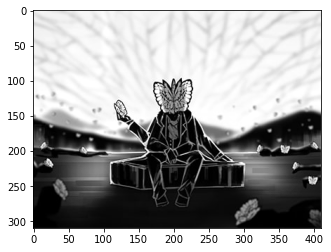

My Gaussian Blur Image
Image Shape : (310, 410)
Kernel Shape : (3, 3)
Output Image size : (310, 410)


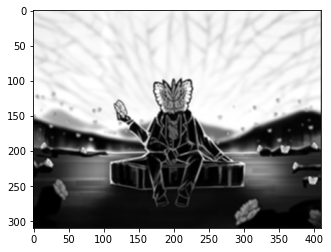

Image Shape : (310, 410)
Kernel Shape : (5, 5)
Output Image size : (310, 410)


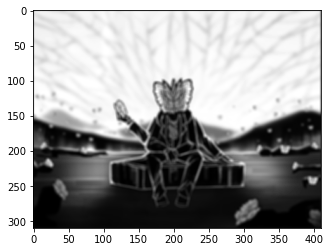

Image Shape : (310, 410)
Kernel Shape : (7, 7)
Output Image size : (310, 410)


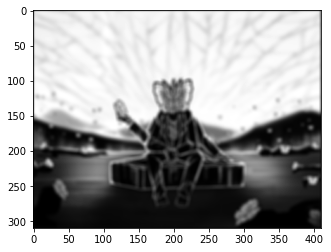

CV2's Gaussian Blur Image


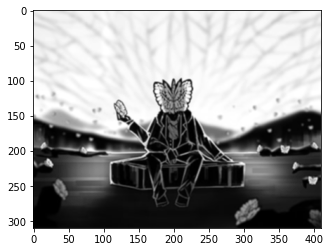

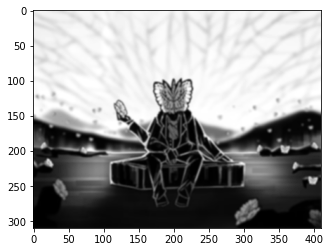

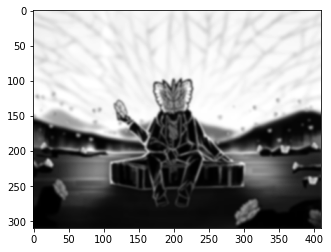

True

In [8]:
#cv2.getGaussianKernel(), cv2.filter2D(), cv2.sepFilter2D(), cv2.GaussianBlur() are NOT allowed to be used in your implementation.
#Original Gaussian Smoothing
#Part 2 of Assignment 1
#convolution function: takes in image matrix, kernal size, and average
#code is 
def convolution(image, kernel, average=False):
    
    #prints image width and height.    
    print("Image Shape : {}".format(image.shape))
    
 #prints kernal width and height
    print("Kernel Shape : {}".format(kernel.shape))
 
    image_row, image_col = image.shape
    kernel_row, kernel_col = kernel.shape
 
    output = np.zeros(image.shape)
    
 #pads the image so input and output image are same size
    pad_height = int((kernel_row - 1) / 2)
    pad_width = int((kernel_col - 1) / 2)
 
    padded_image = np.zeros((image_row + (2 * pad_height), image_col + (2 * pad_width)))
 
    padded_image[pad_height:padded_image.shape[0] - pad_height, pad_width:padded_image.shape[1] - pad_width] = image
 
    for row in range(image_row):
        for col in range(image_col):
            output[row, col] = np.sum(kernel * padded_image[row:row + kernel_row, col:col + kernel_col])
            if average:
                output[row, col] /= kernel.shape[0] * kernel.shape[1]
                
 #Prints the output of the iamge
    print("Output Image size : {}".format(output.shape))
    return output
    
    
# dnorm is the density function: takes in x: a vector, mu: mean, and sd: standard deviation
def dnorm(x, mu, sd):
    return 1 / (np.sqrt(2 * np.pi) * sd) * np.e ** (-np.power((x - mu) / sd, 2) / 2)
#creating gaussian kernal function with image size and sigma input.
def gaussianKernel(size, sigma = 1):
    
    oneDimKernal = np.linspace(-(size//2),size//2, size)
    for i in range(size):
        oneDimKernal[i] = dnorm(oneDimKernal[i], 0, sigma)
    twoDimKernal = np.outer(oneDimKernal.T, oneDimKernal.T)
 
    twoDimKernal *= 1.0 / twoDimKernal.max()
    return twoDimKernal
#our main function for blurring the image.
def gaussianBlur(image, kernel_size):
    kernel = gaussianKernel(kernel_size, sigma=math.sqrt(kernel_size))
    return convolution(image, kernel, average=True)
print("Original image")

plt.imshow(img, 'gray')
plt.show()

print("My Gaussian Blur Image")

img4 = gaussianBlur(img, 3)
plt.imshow(img4, 'gray')
plt.show()
cv2.imwrite('myGaussianBlur3x3.jpg',img4)
img5 = gaussianBlur(img, 5)
plt.imshow(img5, 'gray')
plt.show()
cv2.imwrite('myGaussianBlur5x5.jpg',img5)
img6 = gaussianBlur(img, 7)
plt.imshow(img6, 'gray')
plt.show()
cv2.imwrite('myGaussianBlur7x7.jpg',img6)

print("CV2's Gaussian Blur Image")

blur33 = cv2.GaussianBlur(img, (3, 3), 0)
blur55 = cv2.GaussianBlur(img, (5, 5), 0)
blur77 = cv2.GaussianBlur(img, (7, 7), 0)
plt.imshow(blur33, 'gray')
plt.show()
cv2.imwrite('cv2GaussianBlur3x3.jpg',blur33)
plt.imshow(blur55, 'gray')
plt.show()
cv2.imwrite('cv2GaussianBlur5x5.jpg',blur55)
plt.imshow(blur77, 'gray')
plt.show()
cv2.imwrite('cv2GaussianBlur7x7.jpg',blur77)